In [12]:
import numpy as np 
import pandas as pd

In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as img
import matplotlib.cm as cm
import numpy as np
import matplotlib.style as style
from sklearn.datasets import make_blobs

%matplotlib inline

from scipy.cluster.vq import kmeans,vq
from scipy.cluster.vq import whiten
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,silhouette_samples
import cv2

import warnings
warnings.filterwarnings('ignore')

shape (2412, 4287, 3)
pixels shape : (444000, 3)
New shape : (500, 888, 3)


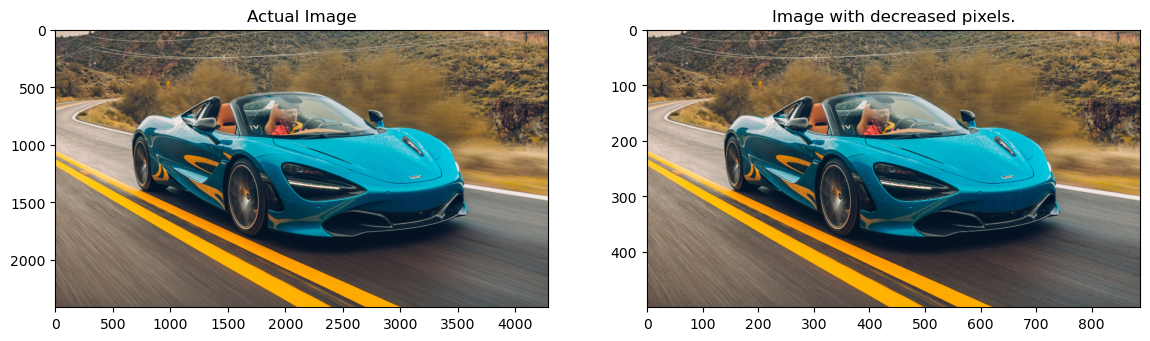

In [14]:
image = img.imread("car.jpg")
print('shape', image.shape)
r, c = image.shape[:2]
out_r = 500
new_image = cv2.resize(image, (int(out_r*float(c)/r), out_r))

pixels = new_image.reshape((-1, 3))

print('pixels shape :', pixels.shape)
print('New shape :', new_image.shape)

plt.figure(figsize=(14,10))
plt.axis("off")

plt.subplot(121)
plt.title('Actual Image')
plt.imshow(image)

plt.subplot(122)
plt.title('Image with decreased pixels.')
plt.imshow(new_image)
plt.show()

In [15]:
r,g,b=[],[],[]
for row in new_image:
    for r_val, g_val, b_val in row:
        r.append(r_val)
        g.append(g_val)
        b.append(b_val)

In [16]:
scaled_red = whiten(r)
scaled_blue = whiten(b)
scaled_green = whiten(g)

In [17]:
import pandas as pd
df = pd.DataFrame({'red':r,'blue':b,'green':g,'scaled_red':scaled_red,'scaled_blue':scaled_blue,
                   'scaled_green':scaled_green})
df.head()

,red,blue,green,scaled_red,scaled_blue,scaled_green
0,-44,-82,-65,3.157832,3.548119,4.011659
1,-43,-81,-64,3.172727,3.568510,4.032663
2,-43,-81,-64,3.172727,3.568510,4.032663
3,-42,-80,-63,3.187623,3.588902,4.053666
4,-42,-80,-63,3.187623,3.588902,4.053666


In [18]:
X= df[['scaled_red','scaled_green','scaled_blue']].values
X

array([[3.15783203, 4.01165934, 3.54811874],
       [3.17272746, 4.03266279, 3.56851022],
       [3.17272746, 4.03266279, 3.56851022],
       ...,
       [1.07247125, 1.63826926, 1.54975301],
       [1.3554845 , 2.03733485, 1.95758275],
       [1.41506624, 2.12134865, 2.05954019]])

In [19]:
distortions = []
K = range(1,8)
for k in K:
    kmeansModel = KMeans(n_clusters=k)
    kmeansModel = kmeansModel.fit(X)
    distortions.append(kmeansModel.inertia_)
     

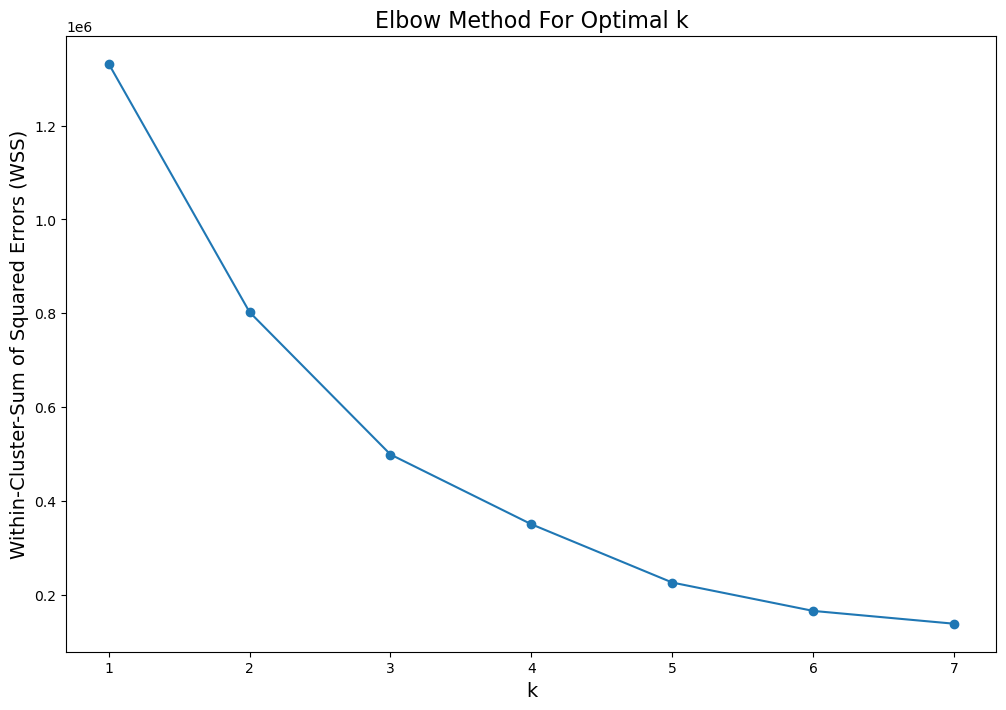

In [20]:
fig, ax = plt.subplots(figsize=(12, 8))
plt.plot(K, distortions, marker='o')
plt.xlabel('k', fontsize = 14)
plt.ylabel('Within-Cluster-Sum of Squared Errors (WSS)', fontsize = 14)
plt.title('Elbow Method For Optimal k', fontsize = 16)
plt.show()

In [21]:
# Silhouette Score Method to to determine the number of K in Kmeans Clustering

# sil = []
# kmax = 10 

# # Dissimilarity would not be defined for a single cluster. Minimum number of clusters should be 2

# for k in range(2, kmax+1):
#   kmeans = KMeans(n_clusters = k).fit(X)
#   labels = kmeans.labels_
#   sil.append(silhouette_score(X, labels, metric = 'euclidean'))

In [22]:
sil

[]

In [23]:
# # Elbow Graph for Silhouette Score

# fig, ax = plt.subplots(figsize=(12, 8))
# plt.plot(K[1:9], sil[:9], marker='o')
# plt.xlabel('k', fontsize = 14)
# plt.ylabel('Silhouette Score', fontsize = 14)
# plt.title('Silhouette Score Elbow for KMeans Clustering', fontsize = 16)
# plt.show()
     

In [32]:
k_means= KMeans(n_clusters=4)
k_means.fit(pixels)
print(k_means.cluster_centers_)

[[ 34.34949783  49.88112642  58.74478941]
 [118.43484698 102.70277518  81.36693437]
 [205.06818095 169.49888092 104.74067964]
 [ 13.19468434 176.76859476 200.70599853]]


In [33]:
colors = np.asarray(k_means.cluster_centers_, dtype='uint8')
print(colors)

[[ 34  49  58]
 [118 102  81]
 [205 169 104]
 [ 13 176 200]]


Original Image --->


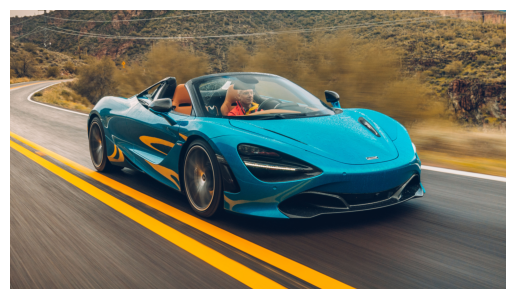

Dominant 4 Colours of Image --->


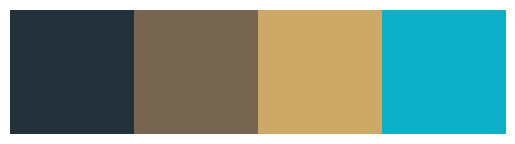

In [34]:
print("Original Image --->")
plt.axis('off')
plt.imshow(image)
plt.show()

print("Dominant",4,"Colours of Image --->")
plt.axis('off')
plt.imshow([colors])
plt.show()

In [35]:
colors = np.asarray(k_means.cluster_centers_, dtype='uint8')
print(colors)

[[ 34  49  58]
 [118 102  81]
 [205 169 104]
 [ 13 176 200]]


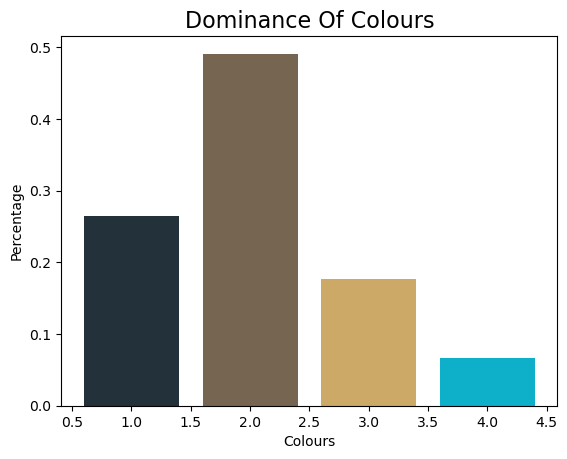

In [46]:
plt.title('Dominance Of Colours', size=16)
plt.bar(range(1,5), percentage, color=np.array(colors)/255)
plt.ylabel('Percentage')
plt.xlabel('Colours')
plt.show()

In [47]:
pixels_colourwise = np.unique(k_means.labels_, return_counts=True)[1]
percentage = pixels_colourwise/pixels.shape[0]
percentage

array([0.26493018, 0.49113514, 0.17666441, 0.06727027])

In [48]:
colors

array([[ 34,  49,  58],
       [118, 102,  81],
       [205, 169, 104],
       [ 13, 176, 200]], dtype=uint8)

In [49]:
p=pixels.copy()
for px in range(pixels.shape[0]):
    for _ in range(colors.shape[0]):
        p[px]=colors[k_means.labels_[px]]

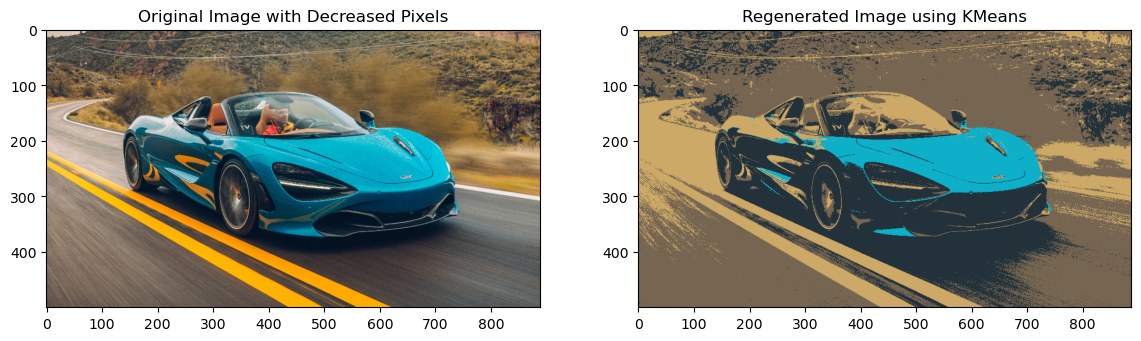

In [50]:
img = p.reshape(out_r, -1, 3)

plt.figure(figsize=(14,10))
plt.subplot(121)
plt.title('Original Image with Decreased Pixels')
plt.imshow(new_image)

plt.subplot(122)
plt.title('Regenerated Image using KMeans')
plt.imshow(img)
plt.show()